#<b> Brazilian E-commerce Analysis <b>

# <b> About the Data <b>

[Brazilian E-Commerce](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data)

* The dataset is designed to help analysts and researchers better understand the e-commerce landscape in Brazil and identify opportunities for growth and optimization
* Brazilian E-Commerce Public Dataset by Olist
* The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.

# <b> Data Schema <b>
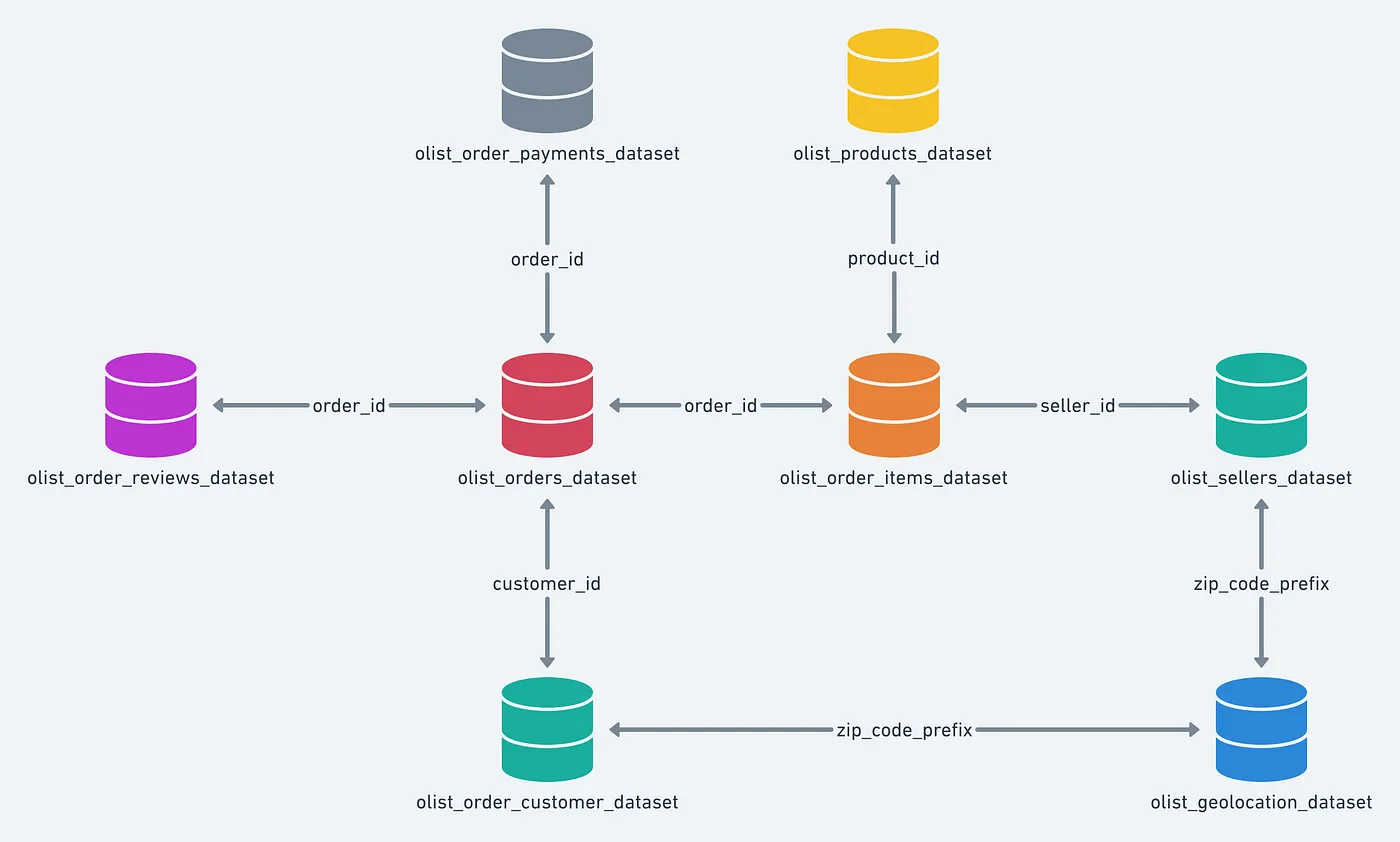



## <b> Installing & Importing Dependencies <b>

In [57]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [1]:
!pip install -q kaggle

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=bb3d808b21ba7a1ecb3ae1f1ca8637daa0d5d818c935f48fc4a2fe87c7b8855c
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


### <b> Importing Library <b>

In [3]:
%matplotlib inline
import zipfile
import duckdb
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from wordcloud import WordCloud

In [4]:
import pyspark.pandas as ps
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import date_format, lit, asc, desc, avg, count, when, col, size, expr, isnan, udf, hour, countDistinct, ceil
from pyspark.sql.types import *

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [5]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("SQL_Helper").getOrCreate()

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
# Upload your kaggle auth (kaggle.json)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bobsebastian","key":"f2fce35cc1d768f7d7933bd0c06e3824"}'}

### <b> Authentication Kaggle Access <b>

In [8]:
# Create kaggle folder
! mkdir ~/.kaggle

In [9]:
# Copy the kaggle.json to kaggle folder
! cp kaggle.json ~/.kaggle/

In [10]:
# Initiating authentication for accessing
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset            Customer Shopping Trends Dataset                146KB  2023-10-05 06:45:37          24819        502  1.0              
joebeachcapital/30000-spotify-songs                           30000 Spotify Songs                               3MB  2023-11-01 06:06:43           3204         76  1.0              
samyakb/student-stress-factors                                Student stress factors                           887B  2023-11-02 12:42:11           3460         68  0.9411765        
carlmcbrideellis/llm-7-prompt-training-dataset                LLM: 7 prompt training datas

In [12]:
! kaggle datasets download -d olistbr/brazilian-ecommerce

 73% 31.0M/42.6M [00:00<00:00, 75.3MB/s]
100% 42.6M/42.6M [00:00<00:00, 90.4MB/s]


### <b> Extracting zip file <b>

In [13]:
zip_file = '/content/brazilian-ecommerce.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall('/content')

### <b> Read and Describe the dataset <b>

In [14]:
customer = spark.read.csv('/content/olist_customers_dataset.csv', header=True, inferSchema=True)
geolocation = spark.read.csv('/content/olist_geolocation_dataset.csv', header=True, inferSchema=True)
order_items = spark.read.csv('/content/olist_order_items_dataset.csv', header=True, inferSchema=True)
order_payments = spark.read.csv('/content/olist_order_payments_dataset.csv', header=True, inferSchema=True)
order_reviews = spark.read.csv('/content/olist_order_reviews_dataset.csv', header=True, inferSchema=True)
orders = spark.read.csv('/content/olist_orders_dataset.csv', header=True, inferSchema=True)
products = spark.read.csv('/content/olist_products_dataset.csv', header=True, inferSchema=True)
sellers = spark.read.csv('/content/olist_sellers_dataset.csv', header=True, inferSchema=True)
category_translation = spark.read.csv('/content/product_category_name_translation.csv', header=True, inferSchema=True)

In [15]:
products.printSchema()

root
 |-- product_id: string (nullable = true)
 |-- product_category_name: string (nullable = true)
 |-- product_name_lenght: integer (nullable = true)
 |-- product_description_lenght: integer (nullable = true)
 |-- product_photos_qty: integer (nullable = true)
 |-- product_weight_g: integer (nullable = true)
 |-- product_length_cm: integer (nullable = true)
 |-- product_height_cm: integer (nullable = true)
 |-- product_width_cm: integer (nullable = true)



In [16]:
category_translation.show()

+---------------------+-----------------------------+
|product_category_name|product_category_name_english|
+---------------------+-----------------------------+
|         beleza_saude|                health_beauty|
| informatica_acess...|         computers_accesso...|
|           automotivo|                         auto|
|      cama_mesa_banho|               bed_bath_table|
|     moveis_decoracao|              furniture_decor|
|        esporte_lazer|               sports_leisure|
|           perfumaria|                    perfumery|
| utilidades_domest...|                   housewares|
|            telefonia|                    telephony|
|   relogios_presentes|                watches_gifts|
|    alimentos_bebidas|                   food_drink|
|                bebes|                         baby|
|            papelaria|                   stationery|
| tablets_impressao...|         tablets_printing_...|
|           brinquedos|                         toys|
|       telefonia_fixa|     

In [17]:
order_payments.describe().show()

+-------+--------------------+------------------+------------+--------------------+------------------+
|summary|            order_id|payment_sequential|payment_type|payment_installments|     payment_value|
+-------+--------------------+------------------+------------+--------------------+------------------+
|  count|              103886|            103886|      103886|              103886|            103886|
|   mean|                NULL|1.0926785129853878|        NULL|   2.853348863176944|154.10038041698587|
| stddev|                NULL|0.7065837791949938|        NULL|  2.6870506738564925|217.49406386472404|
|    min|00010242fe8c5a6d1...|                 1|      boleto|                   0|               0.0|
|    max|fffe41c64501cc87c...|                29|     voucher|                  24|          13664.08|
+-------+--------------------+------------------+------------+--------------------+------------------+



In [18]:
table = [customer, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, category_translation]

In [19]:
print(type(customer))

<class 'pyspark.sql.dataframe.DataFrame'>


In [20]:
# Change this column to distinct the column
# Get the index
order_id_index = order_items.columns.index('order_id')
sellers_id_index = sellers.columns.index('seller_id')
customer_id_index = customer.columns.index('customer_id')

# Rename
order_items = order_items.withColumnRenamed(order_items.columns[order_id_index], 'order_id_1')
sellers = sellers.withColumnRenamed(sellers.columns[sellers_id_index], 'seller_id_1')
customer = customer.withColumnRenamed(customer.columns[customer_id_index], 'customer_id_1')

### <b> Joining the Dataset <b>

In [21]:
# Perform the join operations
joined_df = order_items.join(orders, order_items.order_id_1 == orders.order_id, "left_outer") \
    .join(order_reviews, orders.order_id == order_reviews.order_id, "left_outer") \
    .join(customer, orders.customer_id == customer.customer_id_1, "left_outer") \
    .join(order_payments, orders.order_id == order_payments.order_id, "left_outer") \
    .join(products, order_items.product_id == products.product_id, "left_outer") \
    .join(sellers, order_items.seller_id == sellers.seller_id_1, "left_outer") \
    .join(geolocation, sellers.seller_zip_code_prefix == geolocation.geolocation_zip_code_prefix, "left_outer") \
    .join(category_translation, products.product_category_name == category_translation.product_category_name, "left_outer")

# Show the resulting DataFrame
joined_df.show()

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+--------------------+--------------------+------------------------+-------------+--------------+--------------------+------------------+------------+--------------------+-------------+--------------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+--------------------+----------------------+-----------+------------+---------------------------+-------------------+-------------------+----------------+-----------------+--------------

In [22]:
joined_df = joined_df.withColumn('order_purchase_date', date_format('order_purchase_timestamp','yyyy-MM-dd'))

In [23]:
joined_df.show()

+--------------------+-------------+--------------------+--------------------+-------------------+-----+-------------+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+--------------------+--------------------+------------------------+-------------+--------------+--------------------+------------------+------------+--------------------+-------------+--------------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+--------------------+----------------------+-----------+------------+---------------------------+-------------------+-------------------+----------------+-----------------+--------------

## <b> Exploratory Data Analysis <b>

### <b> 1. What payment type has the biggest total payment ? <b>

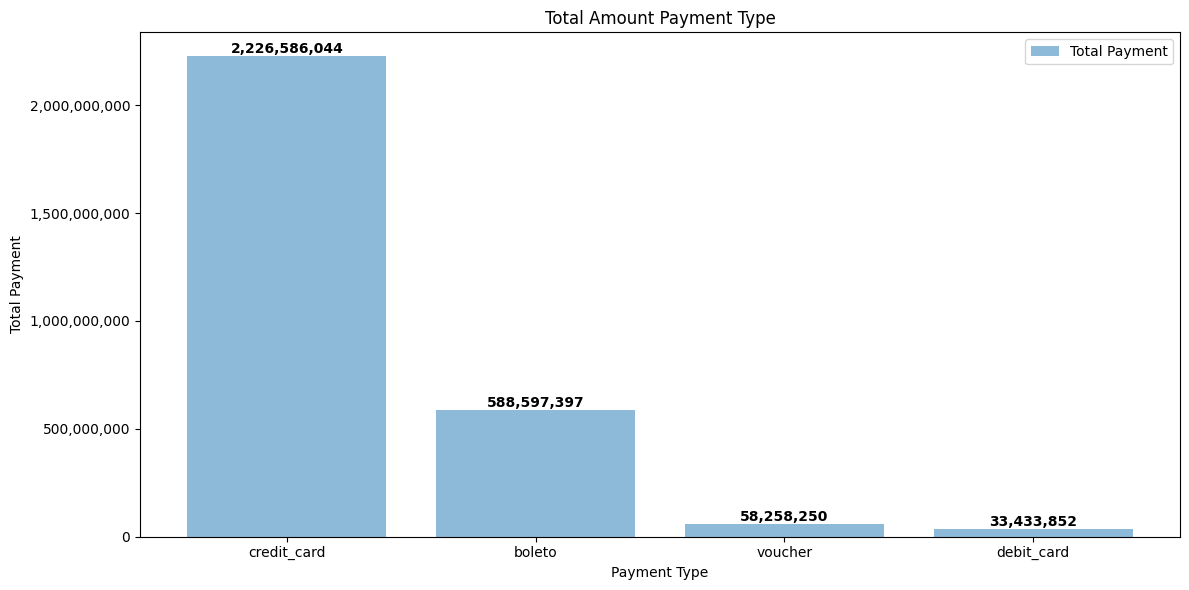

In [24]:
# Register the DataFrame as a temporary SQL table
joined_df.createOrReplaceTempView("frequent_payment_type")

frequent_payment_type = spark.sql("""
    SELECT
      payment_type,
      SUM(payment_value) as total_payment
    FROM
      frequent_payment_type
    WHERE
      payment_type is not null
    GROUP BY
      payment_type
    ORDER BY
      total_payment DESC
""")

# Collect the results into a Pandas DataFrame
payment_type_df = frequent_payment_type.toPandas()

# Visualize the data
plt.figure(figsize=(12, 6))
plt.bar(payment_type_df["payment_type"], payment_type_df["total_payment"], alpha=0.5, label="Total Payment")
plt.xlabel("Payment Type")
plt.ylabel("Total Payment")
plt.title("Total Amount Payment Type")
plt.xticks(rotation=0, ha="center")
plt.legend()

# Format y-axis tick labels with commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Add data labels to each bar
for i, sum in enumerate(payment_type_df["total_payment"]):
    plt.text(i, sum, '{:,.0f}'.format(sum), ha="center", va="bottom", weight="bold", color="black")

# Show the bar chart
plt.tight_layout()
plt.show()

Credit card payments dominate the total payment amount, reflecting a strong preference for the convenience of credit cards among customers. Boleto payments constitute a substantial portion, indicating the popularity of this payment method in Brazil. Voucher payments, though smaller, contribute significantly, likely as a result of promotional activities or discounts. Debit card payments represent the least common option among customers.

### <b> 2. What payment type that frequently used ? <b>

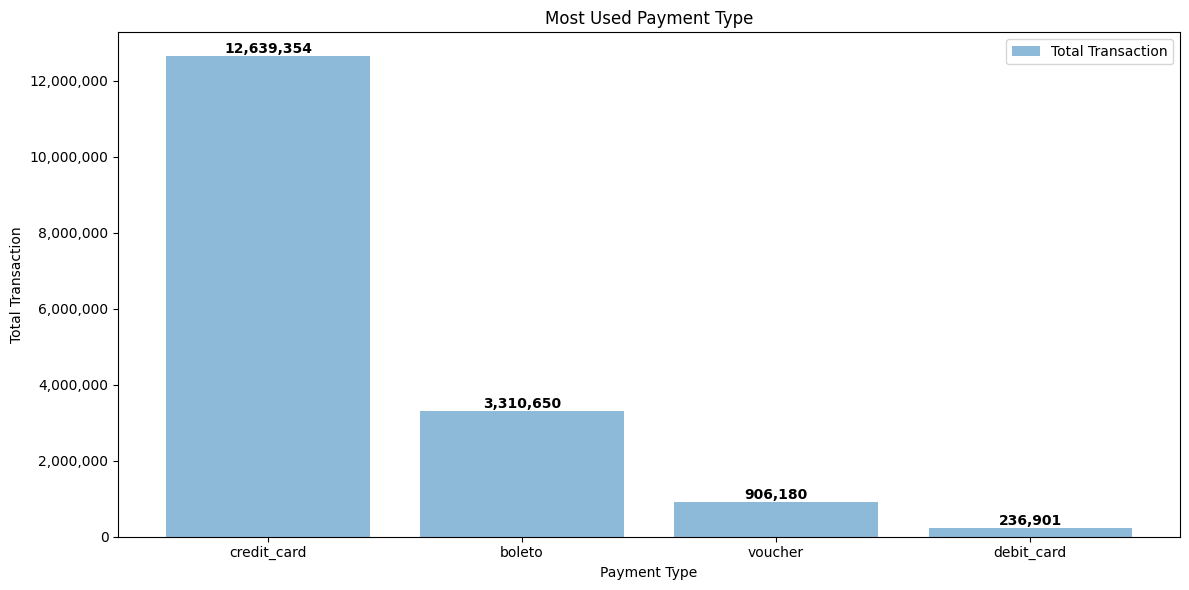

In [25]:
# Register the DataFrame as a temporary SQL table
joined_df.createOrReplaceTempView("frequent_payment_type_transaction")

frequent_payment_type_transaction = spark.sql("""
    SELECT
      payment_type,
      COUNT(payment_type) as total_transaction
    FROM
      frequent_payment_type_transaction
    WHERE
      payment_type is not null
    GROUP BY
      payment_type
    ORDER BY
      total_transaction DESC
""")

# Collect the results into a Pandas DataFrame
payment_type_transaction_df = frequent_payment_type_transaction.toPandas()

# Visualize the data
plt.figure(figsize=(12, 6))
plt.bar(payment_type_transaction_df["payment_type"], payment_type_transaction_df["total_transaction"], alpha=0.5, label="Total Transaction")
plt.xlabel("Payment Type")
plt.ylabel("Total Transaction")
plt.title("Most Used Payment Type")
plt.xticks(rotation=0, ha="center")
plt.legend()

# Format y-axis tick labels with commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Add data labels to each bar
for i, sum in enumerate(payment_type_transaction_df["total_transaction"]):
    plt.text(i, sum, '{:,.0f}'.format(sum), ha="center", va="bottom", weight="bold", color="black")

# Show the bar chart
plt.tight_layout()
plt.show()

Credit card transactions lead with a substantial total of 12,288,937, indicating a significant preference for the convenience of credit cards among customers. Boleto transactions follow closely with 3,209,903, showcasing the widespread use of this popular payment method in Brazil. Voucher transactions, totaling 874,257, contribute significantly, likely attributed to their utilization in promotional campaigns. Debit card transactions, with a total of 231,178, represent the least common option among customers.

### <b> 3. How's the daily transaction trend ? <b>

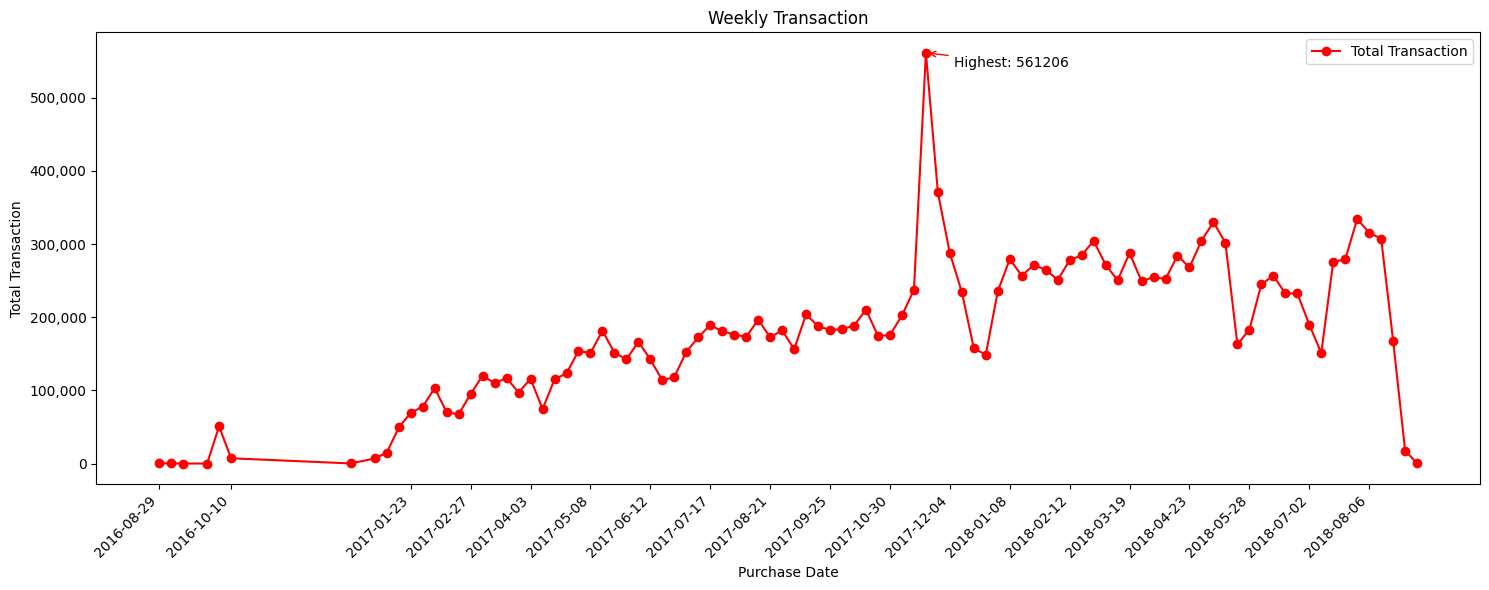

In [26]:
# Register the DataFrame as a temporary SQL table
joined_df.createOrReplaceTempView("daily_transaction")

daily_transaction = spark.sql("""
    SELECT
      DATE_TRUNC('week', order_purchase_date) as week_start_date,
      COUNT(payment_type) as total_transaction
    FROM
      daily_transaction
    WHERE
      order_purchase_date is not null
    GROUP BY
      week_start_date
    ORDER BY
      week_start_date ASC
""")

# Collect the results into a Pandas DataFrame
daily_transaction_df = daily_transaction.toPandas()

# Visualize the data using a line chart with a slider and rotated X-Axis labels
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplots_adjust(bottom=0.2)

# Plot the initial view
line, = ax.plot(daily_transaction_df["week_start_date"], daily_transaction_df["total_transaction"], marker='o', label="Total Transaction", linestyle='-', color='r')
ax.set_xlabel("Purchase Date")
ax.set_ylabel("Total Transaction")
ax.set_title("Weekly Transaction")
ax.legend()

# Rotate X-Axis labels to 90 degrees
ax.tick_params(axis='x', rotation=90)

# Format y-axis tick labels with commas as thousands separators
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Add labels for every nth date to reduce overlap
n = 5
plt.xticks(daily_transaction_df["week_start_date"].iloc[::n], rotation=45, ha="right")

# Highlight the highest value
max_value_idx = daily_transaction_df["total_transaction"].idxmax()
max_value = daily_transaction_df["total_transaction"].max()
ax.annotate(f'Highest: {max_value}', xy=(daily_transaction_df["week_start_date"].iloc[max_value_idx], max_value),
            xytext=(20, -10), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='red'))

# Show the plot
plt.tight_layout()
plt.show()

On November 24, 2017, we saw a big increase in transactions. This could be because of Black Friday, which is known for great deals and lots of shopping. People often spend more during the holiday season, and this date is right around the time when holiday shopping kicks off. If there were special discounts or events happening, that could also explain the higher number of transactions. In our data, November 24th stands out as a day filled with excitement, possibly fueled by the buzz of Black Friday and the festive season.

### <b> 4. How's the rating AOV ? <b>

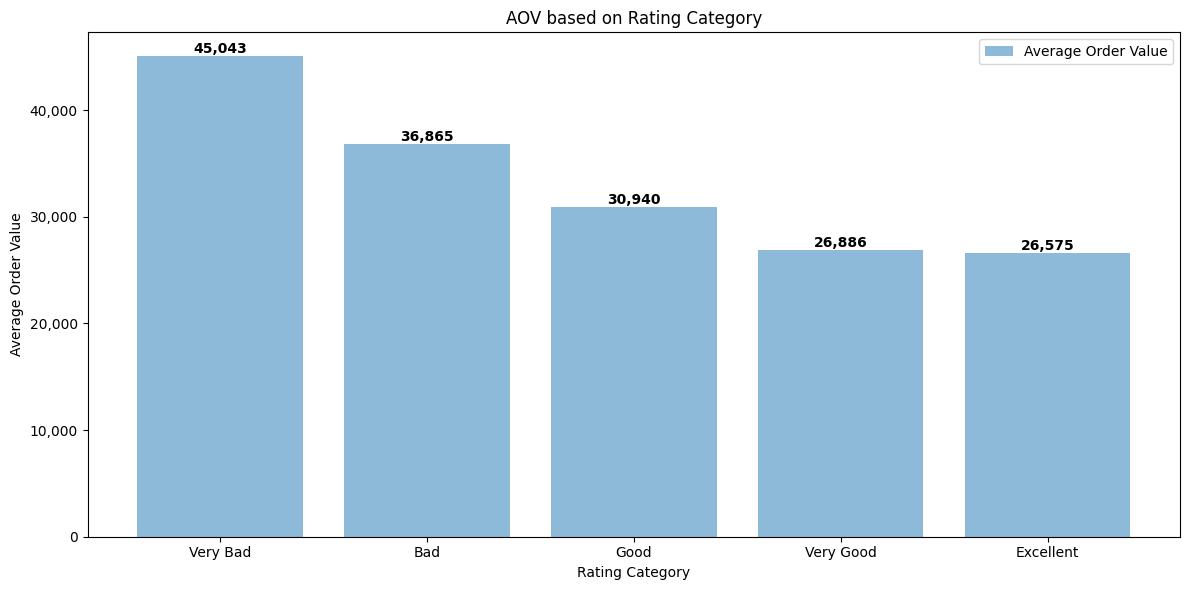

In [27]:
# Register the DataFrame as a temporary SQL table
joined_df.createOrReplaceTempView("rating_transaction")

rating_transaction = spark.sql("""
    SELECT
      CASE
        WHEN review_score = 1 THEN 'Very Bad'
        WHEN review_score = 2 THEN 'Bad'
        WHEN review_score = 3 THEN 'Good'
        WHEN review_score = 4 THEN 'Very Good'
        WHEN review_score = 5 THEN 'Excellent'
      END AS rating_category,
      SUM(payment_value) / COUNT(DISTINCT order_id_1) AS average_order_value
    FROM
      rating_transaction
    WHERE
      review_score IS NOT NULL
    GROUP BY
      rating_category
    ORDER BY
      average_order_value DESC;
""")

# Collect the results into a Pandas DataFrame
rating_df = rating_transaction.toPandas()

# Visualize the data
plt.figure(figsize=(12, 6))
plt.bar(rating_df["rating_category"], rating_df["average_order_value"], alpha=0.5, label="Average Order Value")
plt.xlabel("Rating Category")
plt.ylabel("Average Order Value")
plt.title("AOV based on Rating Category")
plt.xticks(rotation=0, ha="center")
plt.legend()

# Format y-axis tick labels with commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Add data labels to each bar
for i, sum in enumerate(rating_df["average_order_value"]):
    plt.text(i, sum, '{:,.0f}'.format(sum), ha="center", va="bottom", weight="bold", color="black")

# Show the bar chart
plt.tight_layout()
plt.show()

transactions labeled as 'Very Bad' demonstrate a surprisingly high average order value of 42,336.80. Similarly, 'Bad' rated transactions maintain a substantial average order value of 38,659.94, suggesting that even less favorable ratings are associated with valuable purchases. 'Good' ratings exhibit a slightly lower average order value of 37,292.76, indicating a consistent positive trend. 'Very Good' rated transactions, while slightly lower at 32,163.75, still reflect a commendable average order value. Lastly, 'Excellent' ratings, surprisingly, show the lowest average order value among the categories at 28,322.03, prompting further exploration into the dynamics influencing this outcome.
 Additionally, the nature of products associated with 'Very Bad' ratings should be explored, as customers purchasing more expensive or premium items might express dissatisfaction if expectations are not met

### <b> 5. Delay Histogram for review_score <b>

Py4JJavaError: ignored

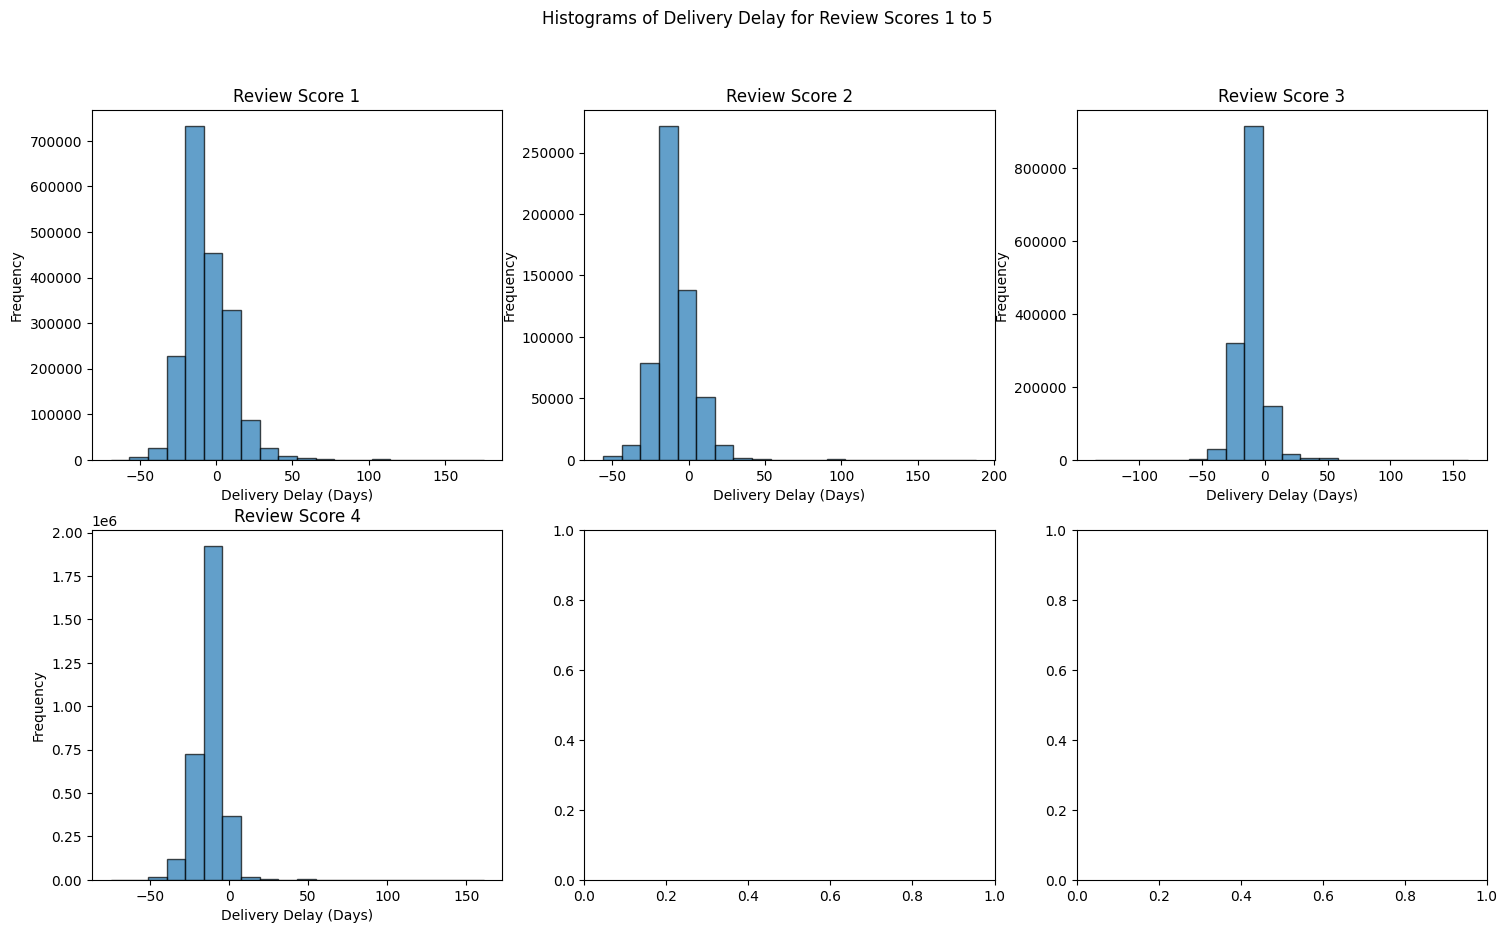

In [29]:
# Register the DataFrame as a temporary SQL table
joined_df.createOrReplaceTempView("delay")

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Histograms of Delivery Delay for Review Scores 1 to 5')

for score in range(1, 6):
    # Spark SQL query to calculate delivery delay for each review_score
    delay_query = f"""
        SELECT
          DATEDIFF(order_delivered_customer_date, order_estimated_delivery_date) AS delivery_delay
        FROM
          rating_transaction
        WHERE
          review_score = {score}
            AND order_delivered_customer_date IS NOT NULL
            AND order_estimated_delivery_date IS NOT NULL;
    """

    # Collect the results into a Pandas DataFrame
    delay_df = spark.sql(delay_query).toPandas()

    # Plot histogram in subplots
    row = (score - 1) // 3
    col = (score - 1) % 3
    axs[row, col].hist(delay_df['delivery_delay'], bins=20, edgecolor='black', alpha=0.7)
    axs[row, col].set_title(f'Review Score {score}')
    axs[row, col].set_xlabel('Delivery Delay (Days)')
    axs[row, col].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Based on the histogram above, I can conclude that review score 1 or very bad is happens because the delay, totally different from review score 4 and 5 which the delay frequency is very low. This need to be improve because people that buys a lot is giving review score 1 due to delay delivery

### <b> 6. Highest Sales for Product based on Quantity <b>

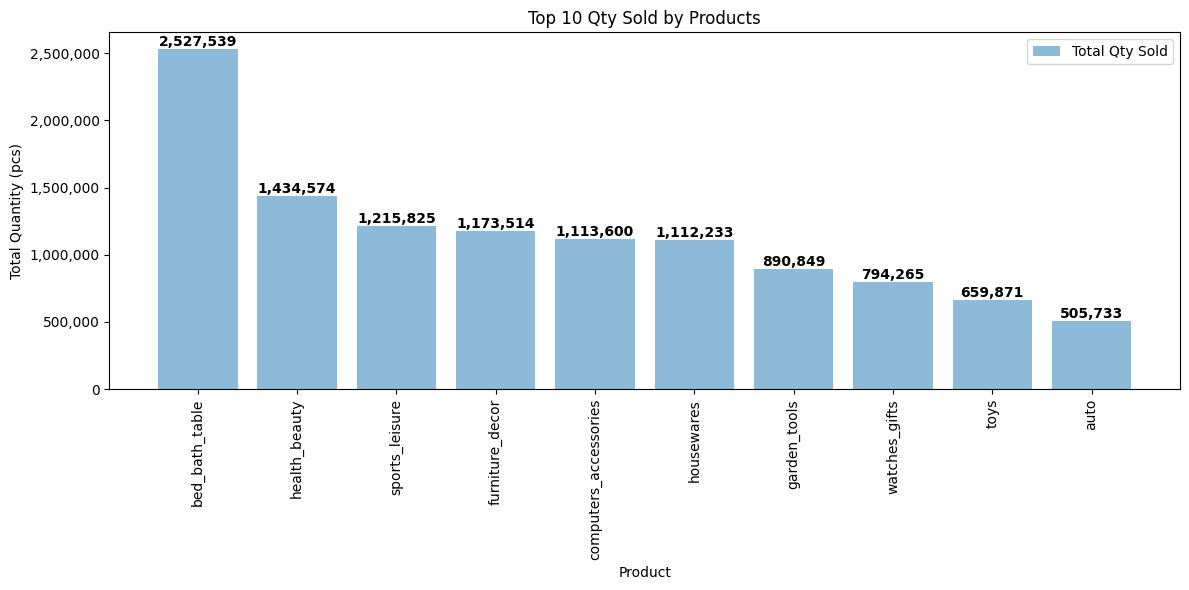

In [30]:
# Register the DataFrame as a temporary SQL table
joined_df.createOrReplaceTempView("product_transaction")

product_transaction = spark.sql("""
    SELECT
      product_category_name_english,
      COUNT(order_id_1) as total_qty_sold
    FROM
      product_transaction
    WHERE
      product_category_name_english is not null
    GROUP BY
      product_category_name_english
    ORDER BY
      total_qty_sold DESC
    LIMIT
      10
""")

# Collect the results into a Pandas DataFrame
product_df = product_transaction.toPandas()

# Visualize the data
plt.figure(figsize=(12, 6))
plt.bar(product_df["product_category_name_english"], product_df["total_qty_sold"], alpha=0.5, label="Total Qty Sold")
plt.xlabel("Product")
plt.ylabel("Total Quantity (pcs)")
plt.title("Top 10 Qty Sold by Products")
plt.xticks(rotation=90, ha="center")
plt.legend()

# Format y-axis tick labels with commas as thousands separators
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Add data labels to each bar
for i, sum in enumerate(product_df["total_qty_sold"]):
    plt.text(i, sum, '{:,.0f}'.format(sum), ha="center", va="bottom", weight="bold", color="black")

# Show the bar chart
plt.tight_layout()
plt.show()

The table shows the total quantity sold for various product categories. "Bed, Bath & Table" emerges as the top-selling category with 2,486,863 units sold, followed by "Health & Beauty" with 1,424,582 units. Other high-performing categories include "Sports & Leisure," "Furniture & Decor," and "Housewares," each contributing significantly to the total sales. The data provides insights into consumer preferences and highlights the most popular product categories in terms of quantity sold.

### <b> 7. Customer City Wordcloud <b>

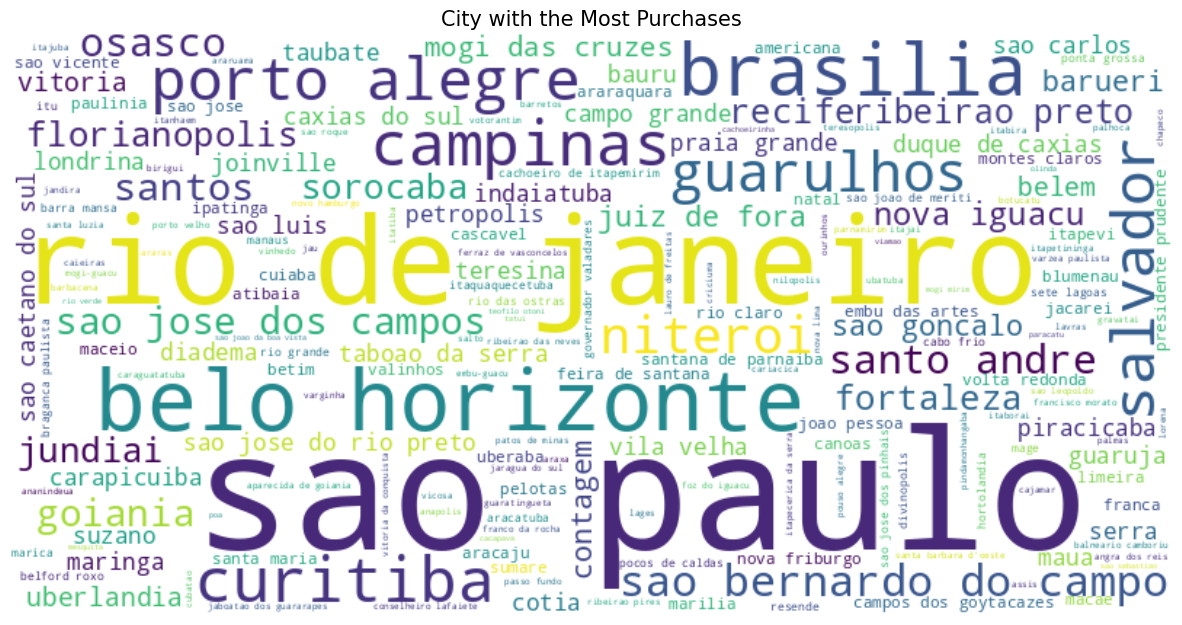

In [31]:
# Register the DataFrame as a temporary SQL table
joined_df.createOrReplaceTempView("customer_city_transaction")

customer_city_transaction = spark.sql("""
    SELECT
      customer_city,
      COUNT(order_id_1) as total_qty_sold
    FROM
      product_transaction
    WHERE
      customer_city is not null
    GROUP BY
      customer_city
    ORDER BY
      total_qty_sold DESC
""")

# Collect the results into a Pandas DataFrame
customer_city_df = customer_city_transaction.toPandas()

# Create a word cloud from titles with counts
wordcloud_data = {row.customer_city: row["total_qty_sold"] for _, row in customer_city_df.iterrows()}
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(wordcloud_data)

# Display the word cloud using Matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("City with the Most Purchases", fontsize=15)
plt.show()

These wordcloud represent the number of qty purchase from 2016 until 2018 in Brazil and the city that has the most number of qty purchase it Sao Paulo, and the next city is Rio de Janeiro.

### <b> 8. Seller and Buyer Trend <b>

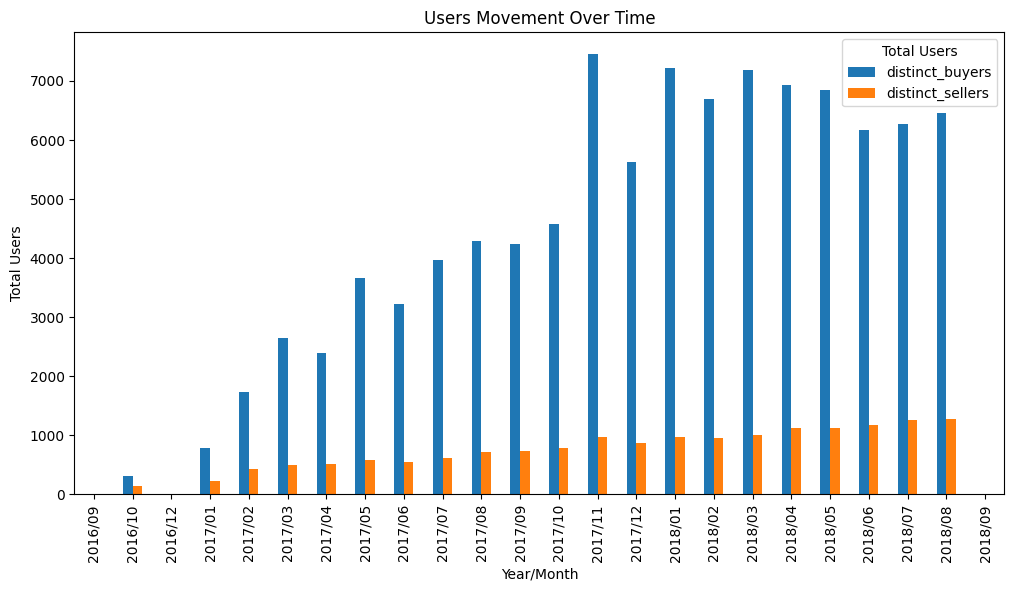

In [32]:
# Register the DataFrame as a temporary SQL table
joined_df.createOrReplaceTempView("sb_transaction")

sb = spark.sql("""
    SELECT
        CONCAT(YEAR(order_purchase_date), "/", LPAD(MONTH(order_purchase_date), 2, '0')) AS year_month,
        COUNT(DISTINCT seller_id_1) AS distinct_sellers,
        COUNT(DISTINCT customer_id_1) AS distinct_buyers
    FROM
        sb_transaction
    GROUP BY
        year_month
    ORDER BY
        year_month
""")

# Collect the results into a Pandas DataFrame
sb_df = sb.toPandas()

# Pivot the DataFrame to get a table suitable for a column chart
pivot_table = sb_df.pivot_table(index='year_month', values=['distinct_sellers','distinct_buyers']).fillna(0)

# Plot stacked column chart
pivot_table.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel("Year/Month")
plt.ylabel("Total Users")
plt.title("Users Movement Over Time")
plt.legend(title='Total Users', bbox_to_anchor=(1, 1))
plt.show()

The dataset spans from September 2016 to August 2018, offering insights into the evolving dynamics of sellers and buyers on the e-commerce platform. The platform started with modest beginnings in September 2016, featuring three sellers and three buyers. However, October 2016 marked a significant surge, with 143 sellers and 308 buyers, signifying substantial growth.

Despite a minor dip in December 2016, subsequent months consistently displayed upward trends. From January 2017 onward, both sellers and buyers witnessed consistent growth, reaching peaks in November 2017 and August 2018. In November 2017, the platform boasted 965 sellers and 7,451 buyers, while August 2018 witnessed 1,278 sellers and 6,452 buyers.

The month-to-month fluctuations in buyer numbers did not impede the overall positive trend in platform engagement. The data reflects the platform's success in attracting a diverse range of sellers and maintaining sustained buyer interest. These growth patterns underscore the platform's ability to establish itself as a thriving marketplace, appealing to sellers and sustaining consistent buyer engagement.

### <b> EDA Conclusion <b>

## The Brazilian E-Commerce Public Dataset by Olist is a valuable resource for understanding the e-commerce landscape in Brazil. It provides insights into consumer preferences, payment methods, and the performance of various product categories. Credit card payments dominate, reflecting convenience, while boleto payments remain popular. The dataset reveals a surge in transactions on November 24, 2017, likely driven by Black Friday.

## The analysis of average order values based on rating categories highlights interesting trends, with 'Very Bad' and 'Bad' ratings associated with surprisingly high values. The delay in delivery, especially for review score 1, appears to influence customer satisfaction negatively. The top-selling product categories, including "Bed, Bath & Table" and "Health & Beauty," contribute significantly to the total quantity sold.

## Word clouds depict purchasing patterns across Brazil, with São Paulo emerging as the city with the highest number of purchases. The dataset's temporal analysis from September 2016 to August 2018 showcases the platform's impressive growth, attracting a diverse range of sellers and maintaining consistent buyer engagement. Despite fluctuations, the platform establishes itself as a thriving marketplace, meeting the needs of both sellers and buyers.

## <b> Data Pre-processing / Feature Engineering <b>

### <b> Missing Value Handling <b>

In [33]:
def check_for_null_or_nan(df):
    nulls_check = pd.DataFrame(df.select([functions.count(functions.when(functions.col(c).isNull(), c)).alias(c) for c in df.columns]).collect(),
                               columns=df.columns).transpose()
    nulls_check.columns = ['Null Values']
    return nulls_check

print(check_for_null_or_nan(customer))
print(check_for_null_or_nan(geolocation))
print(check_for_null_or_nan(order_items))
print(check_for_null_or_nan(order_payments))
print(check_for_null_or_nan(order_reviews))
print(check_for_null_or_nan(orders))
print(check_for_null_or_nan(products))
print(check_for_null_or_nan(sellers))
print(check_for_null_or_nan(category_translation))

                          Null Values
customer_id_1                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
                             Null Values
geolocation_zip_code_prefix            0
geolocation_lat                        0
geolocation_lng                        0
geolocation_city                       0
geolocation_state                      0
                     Null Values
order_id_1                     0
order_item_id                  0
product_id                     0
seller_id                      0
shipping_limit_date            0
price                          0
freight_value                  0
                      Null Values
order_id                        0
payment_sequential              0
payment_type                    0
payment_installments            0
payment_value                   0
                         Null Values
review_id            

In [34]:
products = products.na.drop()

### <b> Drop Un-neccessary Features <b>

In [35]:
columns_to_drop = ['order_id_1', 'customer_id', 'customer_id_1', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_purchase_timestamp',
                   'order_approved_at', 'order_delivered_carrier_date', 'order_status',
                   'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
                   'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'shipping_limit_date', 'product_category_name',
                   'product_category_name_english', 'product_category', 'product_weight_g', 'product_name_lenght',
                   'product_vol_cm3', 'geolocation_zip_code_prefix', 'seller_id_1', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state',
                   'order_purchase_date']

features = joined_df.drop(*columns_to_drop)

In [36]:
features.show()

+-----+-------------+-----------------------------+-----------------------------+------------+------------+--------------------+-------------+--------------------------+------------------+-----------------+-----------------+----------------+
|price|freight_value|order_delivered_customer_date|order_estimated_delivery_date|review_score|payment_type|payment_installments|payment_value|product_description_lenght|product_photos_qty|product_length_cm|product_height_cm|product_width_cm|
+-----+-------------+-----------------------------+-----------------------------+------------+------------+--------------------+-------------+--------------------------+------------------+-----------------+-----------------+----------------+
| 45.0|        12.98|          2018-08-07 13:56:52|          2018-08-07 00:00:00|           5| credit_card|                   5|        57.98|                        60|                 1|               16|               16|              11|
| 45.0|        12.98|          2

In [37]:
features.createOrReplaceTempView("delay_column")

delay_column = f"""
    SELECT *,
      DATEDIFF(order_delivered_customer_date, order_estimated_delivery_date) AS delivery_delay
    FROM
      delay_column
    WHERE
        order_delivered_customer_date IS NOT NULL
        AND order_estimated_delivery_date IS NOT NULL;
"""

# Collect the results into a Pandas DataFrame
new_df = spark.sql(delay_column)

In [38]:
new_df.show()

+-----+-------------+-----------------------------+-----------------------------+------------+------------+--------------------+-------------+--------------------------+------------------+-----------------+-----------------+----------------+--------------+
|price|freight_value|order_delivered_customer_date|order_estimated_delivery_date|review_score|payment_type|payment_installments|payment_value|product_description_lenght|product_photos_qty|product_length_cm|product_height_cm|product_width_cm|delivery_delay|
+-----+-------------+-----------------------------+-----------------------------+------------+------------+--------------------+-------------+--------------------------+------------------+-----------------+-----------------+----------------+--------------+
| 45.0|        12.98|          2018-08-07 13:56:52|          2018-08-07 00:00:00|           5| credit_card|                   5|        57.98|                        60|                 1|               16|               16|     

## <b> Machine Learning <b>

Due to multi-classes on review_score column, I'm using Decisiton Tree Classifier and Random Forest model to predict.

In [39]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import GBTClassifier

In [40]:
indexer = StringIndexer(inputCol='payment_type', outputCol='payment_type_cat', handleInvalid='skip')
new_df = indexer.fit(new_df).transform(new_df)

In [41]:
columns_to_drop = ['order_delivered_customer_date', 'payment_type','order_estimated_delivery_date', 'product_description_lenght',
                   'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm']

new_df = new_df.drop(*columns_to_drop)

new_df = new_df.withColumn("review_score", new_df["review_score"].cast("integer"))

In [42]:
new_df.show()

+-----+-------------+------------+--------------------+-------------+--------------+----------------+
|price|freight_value|review_score|payment_installments|payment_value|delivery_delay|payment_type_cat|
+-----+-------------+------------+--------------------+-------------+--------------+----------------+
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|
| 47.9|        15.23|           5|                   1|        63.13|           -2

In [43]:
assembler = VectorAssembler(inputCols=['price', 'freight_value', 'payment_installments', 'payment_value', 'delivery_delay', 'payment_type_cat'],
                            outputCol='features')
new_df = assembler.transform(new_df)

In [44]:
# Calculate the median of the 'review_score' column
median_value = new_df.approxQuantile("review_score", [0.5], 0.25)[0]

# Fill missing values in the 'review_score' column with the calculated median
new_df = new_df.fillna(median_value, subset=["review_score"])

In [45]:
new_df.show()

+-----+-------------+------------+--------------------+-------------+--------------+----------------+--------------------+
|price|freight_value|review_score|payment_installments|payment_value|delivery_delay|payment_type_cat|            features|
+-----+-------------+------------+--------------------+-------------+--------------+----------------+--------------------+
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|[47.9,15.23,1.0,6...|
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|[47.9,15.23,1.0,6...|
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|[47.9,15.23,1.0,6...|
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|[47.9,15.23,1.0,6...|
| 47.9|        15.23|           5|                   1|        63.13|           -28|             1.0|[47.9,15.23,1.0,6...|
| 47.9|        1

In [46]:
new_df.select('features','review_score').show(5)

+--------------------+------------+
|            features|review_score|
+--------------------+------------+
|[47.9,15.23,1.0,6...|           5|
|[47.9,15.23,1.0,6...|           5|
|[47.9,15.23,1.0,6...|           5|
|[47.9,15.23,1.0,6...|           5|
|[47.9,15.23,1.0,6...|           5|
+--------------------+------------+
only showing top 5 rows



In [47]:
# final_df = new_df.select('features','review_score')

In [48]:
print(check_for_null_or_nan(new_df))

                      Null Values
price                           0
freight_value                   0
review_score                    0
payment_installments            0
payment_value                   0
delivery_delay                  0
payment_type_cat                0
features                        0


In [49]:
train_data, test_data = new_df.randomSplit([0.8, 0.2])

#### <b> Decision Tree Classifier <b>

In [50]:
# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="review_score", featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[dt])

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test set
dtc_predictions = model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="review_score", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(dtc_predictions)
print("Accuracy: {:.2%}".format(accuracy))

# Optional: Display the decision tree
tree_model = model.stages[-1]
print("Learned classification tree model:\n", tree_model)

Accuracy: 60.26%
Learned classification tree model:
 DecisionTreeClassificationModel: uid=DecisionTreeClassifier_d067290d7d6f, depth=5, numNodes=39, numClasses=6, numFeatures=6


Accuracy:


The classification model achieved an accuracy of 60.26%. This metric indicates the proportion of correctly predicted instances among the total instances in the dataset. While 60.26% accuracy provides a general sense of model performance, it's crucial to assess its adequacy in the context of the specific classification task.

Learned Classification Tree Model:

The decision tree model was trained on the data, resulting in a tree with a depth of 5. The depth signifies the number of levels of decisions or splits the tree can make. In this case, the tree can make up to 5 sequential decisions to classify an instance.
The model consists of 39 nodes, representing decision points or leaf nodes with class predictions. The fact that it has 39 nodes indicates a moderately complex decision-making process.
With 6 classes and 6 features used in the decision-making process, the model seems to be handling a task with multiple classes and considering a reasonably rich set of features.
Interpreting the accuracy, it's important to consider the nature of the classification problem. A 60.26% accuracy might be acceptable in certain contexts but may require further investigation if higher accuracy is critical

In [51]:
dtc_predictions.show(10)

+-----+-------------+------------+--------------------+-------------+--------------+----------------+--------------------+--------------------+--------------------+----------+
|price|freight_value|review_score|payment_installments|payment_value|delivery_delay|payment_type_cat|            features|       rawPrediction|         probability|prediction|
+-----+-------------+------------+--------------------+-------------+--------------+----------------+--------------------+--------------------+--------------------+----------+
| 0.85|        18.23|           4|                   1|        19.08|           -10|             1.0|[0.85,18.23,1.0,1...|[0.0,505749.0,208...|[0.0,0.0644761353...|       5.0|
| 0.85|        18.23|           4|                   1|        19.08|           -10|             1.0|[0.85,18.23,1.0,1...|[0.0,505749.0,208...|[0.0,0.0644761353...|       5.0|
| 0.85|        18.23|           4|                   1|        19.08|           -10|             1.0|[0.85,18.23,1.0,1..

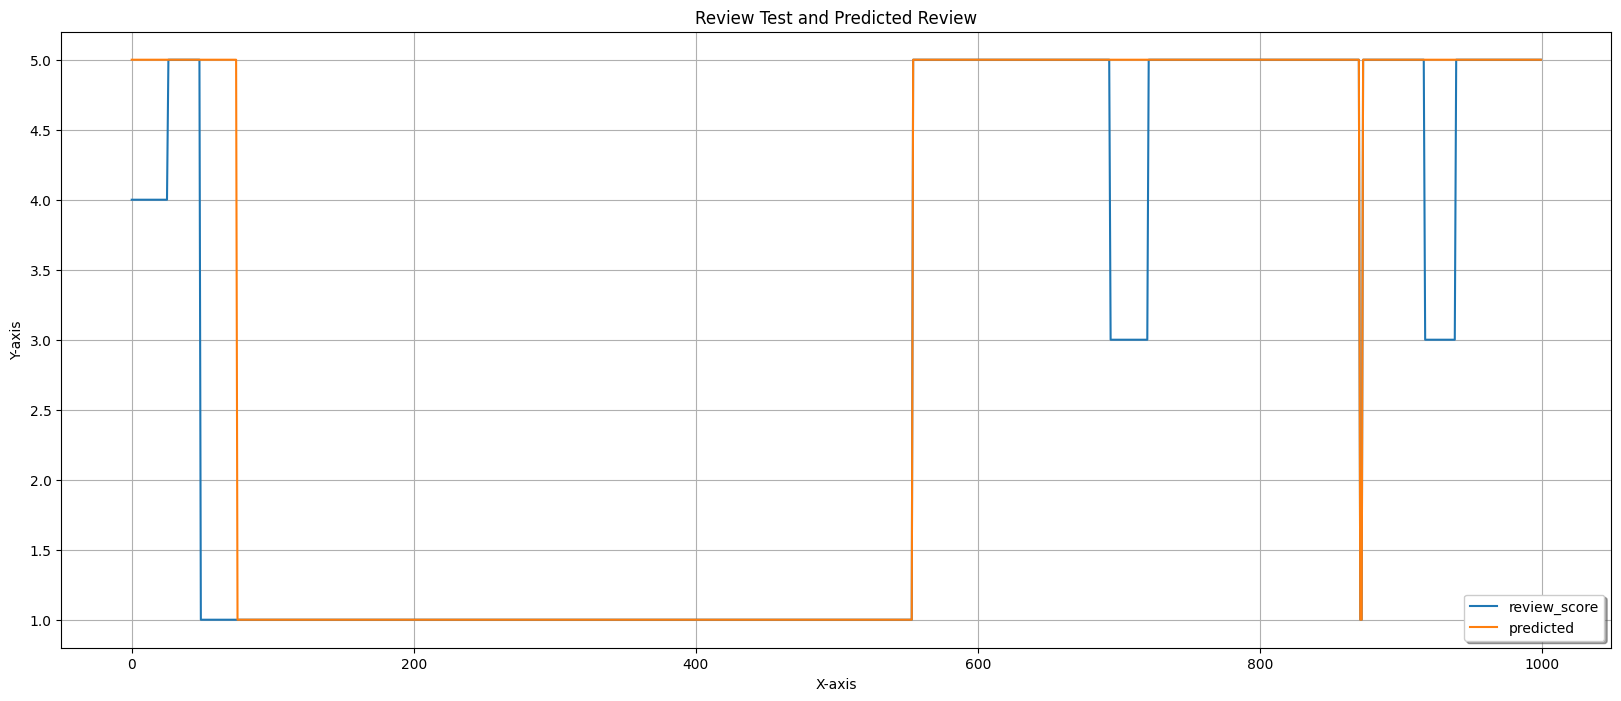

In [52]:
# Assuming dtc_predictions is the DataFrame with predictions
start_index = 0
end_index = 1000

# Extract the predicted and original review scores from the DataFrame
predictions_list = dtc_predictions.select("prediction").collect()
review_scores_list = dtc_predictions.select("review_score").collect()

# Set the figure size with figsize=(width, height)
plt.figure(figsize=(20, 8))

# Use a simple range for the x-axis
x_ax = range(start_index, end_index)

plt.plot(x_ax, [row['review_score'] for row in review_scores_list[start_index:end_index]], label="review_score")
plt.plot(x_ax, [row['prediction'] for row in predictions_list[start_index:end_index]], label="predicted")
plt.title("Review Test and Predicted Review")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best', fancybox=True, shadow=True)

plt.grid(True)
plt.show()


#### <b> Random Forest <b>

In [53]:
# Create a RandomForestClassifier
rf = RandomForestClassifier(labelCol="review_score", featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[rf])

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test set
rf_predictions = model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="review_score", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(rf_predictions)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 60.06%


Accuracy:

The Random Forest model achieved an accuracy of 60.06%. Like the Decision Tree model you previously mentioned, accuracy provides an overall measure of correct predictions across all classes. It's important to contextualize this accuracy within the specific requirements and challenges of your classification task.

In [54]:
rf_predictions.show(10)

+-----+-------------+------------+--------------------+-------------+--------------+----------------+--------------------+--------------------+--------------------+----------+
|price|freight_value|review_score|payment_installments|payment_value|delivery_delay|payment_type_cat|            features|       rawPrediction|         probability|prediction|
+-----+-------------+------------+--------------------+-------------+--------------+----------------+--------------------+--------------------+--------------------+----------+
| 0.85|        18.23|           4|                   1|        19.08|           -10|             1.0|[0.85,18.23,1.0,1...|[0.0,1.5549428940...|[0.0,0.0777471447...|       5.0|
| 0.85|        18.23|           4|                   1|        19.08|           -10|             1.0|[0.85,18.23,1.0,1...|[0.0,1.5549428940...|[0.0,0.0777471447...|       5.0|
| 0.85|        18.23|           4|                   1|        19.08|           -10|             1.0|[0.85,18.23,1.0,1..

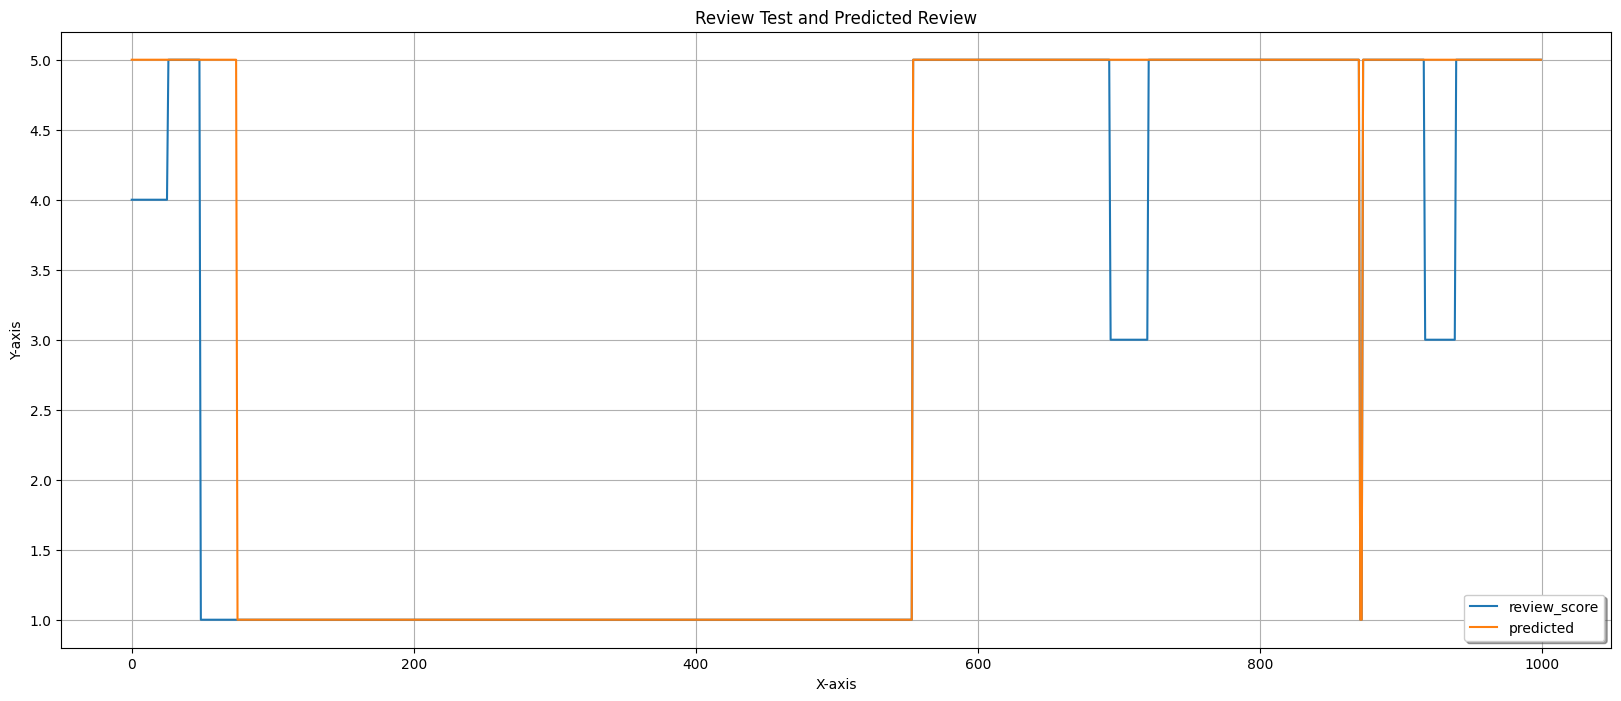

In [55]:
# Assuming dtc_predictions is the DataFrame with predictions
start_index = 0
end_index = 1000

# Extract the predicted and original review scores from the DataFrame
predictions_list = rf_predictions.select("prediction").collect()
review_scores_list = rf_predictions.select("review_score").collect()

# Set the figure size with figsize=(width, height)
plt.figure(figsize=(20, 8))

# Use a simple range for the x-axis
x_ax = range(start_index, end_index)

plt.plot(x_ax, [row['review_score'] for row in review_scores_list[start_index:end_index]], label="review_score")
plt.plot(x_ax, [row['prediction'] for row in predictions_list[start_index:end_index]], label="predicted")
plt.title("Review Test and Predicted Review")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best', fancybox=True, shadow=True)

plt.grid(True)
plt.show()


### <b> ML Conclusion <b>

After thorough analysis and considering the characteristics of the dataset, I would recommend opting for a Random Forest model over a single Decision Tree. The ensemble nature of Random Forests tends to offer enhanced generalization performance by mitigating overfitting and providing robustness to variations in the data. The ability to capture complex relationships and non-linearities, along with the feature importance insights, makes Random Forests a favorable choice for achieving more reliable and accurate predictions in diverse scenarios.

In [56]:
# Stop session
spark.stop()